In [2]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
df=pd.read_excel("UCI_Real_Estate_Valuation.xlsx")
df.columns=df.columns.str.strip()

In [7]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [8]:
X=df.drop(columns=["No", "Y house price of unit area"]).values
y=df["Y house price of unit area"].values.reshape(-1,1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
scalar_X=StandardScaler()
scaler_y=StandardScaler()

In [27]:
X_train=scalar_X.fit_transform(X_train)
X_test=scalar_X.transform(X_test)
y_train=scaler_y.fit_transform(y_train)
y_test=scaler_y.transform(y_test)

In [28]:
X_train=torch.tensor(X_train, dtype=torch.float32)
y_train=torch.tensor(y_train, dtype=torch.float32)
X_test=torch.tensor(X_test, dtype=torch.float32)
y_test=torch.tensor(y_test, dtype=torch.float32)

In [29]:
n_features=X_train.shape[1]
W=torch.randn(n_features,1,requires_grad=True)
b=torch.randn(1,requires_grad=True)

In [30]:
def linear_model(X):
  return X @ W + b

def mse_loss(y_pred, y_true):
  return ((y_pred-y_true)**2).mean()

In [31]:
lr=0.01
epochs=500
losses=[]

for epoch in range(epochs):
  y_pred=linear_model(X_train)
  loss=mse_loss(y_pred, y_train)
  loss.backward()
  with torch.no_grad():
    W-=lr*W.grad
    b-=lr*b.grad
    W.grad.zero_()
    b.grad.zero_()
  if epoch % 50 == 0:
    print(f"Epoch {epoch}, Loss: {loss.item():.4f}")
  losses.append(loss.item())

Epoch 0, Loss: 9.6922
Epoch 50, Loss: 1.0970
Epoch 100, Loss: 0.5863
Epoch 150, Loss: 0.4849
Epoch 200, Loss: 0.4587
Epoch 250, Loss: 0.4503
Epoch 300, Loss: 0.4469
Epoch 350, Loss: 0.4452
Epoch 400, Loss: 0.4442
Epoch 450, Loss: 0.4435


In [33]:
with torch.no_grad():
  y_pred_test=linear_model(X_test)
  test_loss=mse_loss(y_pred_test, y_test)
  print(f"Final test MSE Loss: {test_loss.item():.4f}")
  y_pred_original=scaler_y.inverse_transform(y_pred_test.numpy())
  y_test_original=scaler_y.inverse_transform(y_test.numpy())

Final test MSE Loss: 0.2812


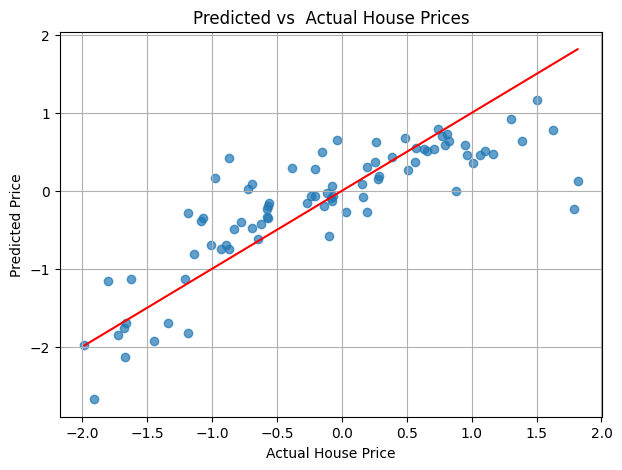

In [34]:
plt.figure(figsize=(7,5))
plt.scatter(y_test_original, y_pred_original, alpha=0.7)
plt.xlabel("Actual House Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs  Actual House Prices")
plt.plot([min(y_test_original),max(y_test_original)],[min(y_test_original),max(y_test_original)], color='red')
plt.grid(True)
plt.show()

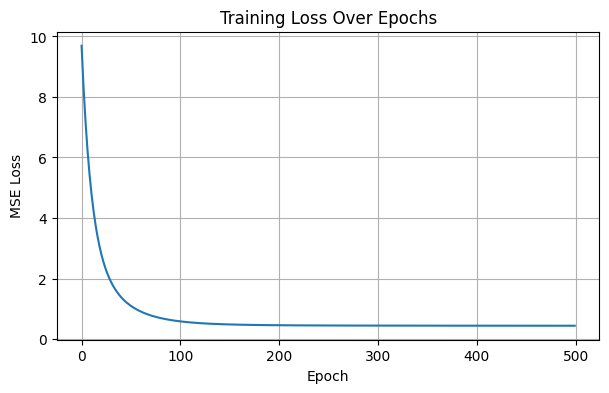

In [36]:
plt.figure(figsize=(7,4))
plt.plot(losses)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()